In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./Smartphone_2024.csv', index_col='Id')

In [3]:
df.sample(5)

,Model,Price,Rating,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
Id,,,,,,,,,,,
589,Xiaomi Mi 11X Pro,"₹26,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4520 mAh Battery with 33W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",108 MP + 8 MP + 5 MP Triple Rear & 20 MP Front...,Android v11,No FM Radio
379,Tecno Spark 9 (4GB RAM + 64GB),"₹5,999",65.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G37, Octa Core, 2.3 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery,"6.6 inches, 720 x 1600 px, 90 Hz Display with ...",13 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 256 GB",Android v12
398,Infinix Hot 30i,"₹8,499",76.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G37, Octa Core, 2.3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.6 inches, 720 x 1612 px, 90 Hz Display with ...",50 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v12
455,Nokia 130 Music 2023,"₹1,799",NaN,Dual Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",v30
390,Infinix Smart 8 HD,"₹6,298",64.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Unisoc T606, Octa Core, 1.6 GHz Processor","3 GB RAM, 64 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.6 inches, 720 x 1612 px, 90 Hz Display with ...",13 MP + 0.08 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 2 TB",Android v13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            1020 non-null   object 
 1   Price            1020 non-null   object 
 2   Rating           443 non-null    float64
 3   Specification    1020 non-null   object 
 4   Processor        1020 non-null   object 
 5   RAM              1020 non-null   object 
 6   Battery          1020 non-null   object 
 7   Display          1020 non-null   object 
 8   Camera           1020 non-null   object 
 9   Memory           1003 non-null   object 
 10  OperatingSystem  976 non-null    object 
dtypes: float64(1), object(10)
memory usage: 95.6+ KB


In [5]:
df.drop(columns=['Rating'], inplace=True)
df.sample()

,Model,Price,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
Id,,,,,,,,,,
379,Tecno Spark 9 (4GB RAM + 64GB),"₹5,999","Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G37, Octa Core, 2.3 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery,"6.6 inches, 720 x 1600 px, 90 Hz Display with ...",13 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 256 GB",Android v12


In [6]:
df.sample()

,Model,Price,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
Id,,,,,,,,,,
201,itel S23 Plus,"₹13,999","Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Tiger T616, Octa Core, 2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.78 inches, 1080 x 2400 px Display with Punch...",50 MP + 0.08 MP Dual Rear & 32 MP Front Camera,Android v13,Bluetooth


In [7]:
def reorder(X):
    columns = ['Processor', 'RAM', 'Battery', 'Display', 'Camera', 'Memory', 'OperatingSystem']
    X2 = X.copy()
    X2['Processor'] = np.nan
    for col in columns:
        if 'Processor' in str(X[col]) or 'GHz' in str(X[col]) or 'MHz' in str(X[col]):
            X2['Processor'] = X[col]
            break

    X2['RAM'] = np.nan
    for col in columns:
        if 'RAM' in str(X[col]):
            X2['RAM'] = X[col]
            break

    X2['Battery'] = np.nan
    for col in columns:
        if 'mAh' in str(X[col]):
            X2['Battery'] = X[col]
            break

    X2['Display'] = np.nan
    for col in columns:
        if 'Display' in str(X[col]) or 'inches' in str(X[col]):
            X2['Display'] = X[col]
            break
    
    X2['Camera'] = np.nan
    for col in columns:
        if 'Camera' in str(X[col]):
            X2['Camera'] = X[col]
            break

    X2['Memory'] = np.nan
    for col in columns:
        if 'Memory Card' in str(X[col]):
            X2['Memory'] = X[col]
            break
    
    X2['OperatingSystem'] = np.nan
    for col in columns:
        if 'Android' in str(X[col]):
            X2['OperatingSystem'] = X[col]
            break
        if 'iOS' in str(X[col]):
            X2['OperatingSystem'] = X[col]
            break
         
    
    return X2

In [8]:
df.nunique().sum()

2794

In [9]:
df = df.apply(reorder, axis=1)

In [10]:
df.nunique().sum()

2667

In [11]:
df.sample(3)

,Model,Price,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
Id,,,,,,,,,,
456,Jio Bharat K1 Karbonn,₹999,"Single Sim, 3G, 4G, VoLTE",NaN,"512 MB RAM, 4 GB inbuilt",1000 mAh Battery,"1.77 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 128 GB",NaN
481,Vivo X70 Pro Plus 5G,"₹52,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888+, Octa Core, 2.9 GHz Processor","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 55W Fast Charging,"6.78 inches, 1440 x 3200 px, 120 Hz Display wi...",50 MP Quad Rear & 32 MP Front Camera,NaN,Android v11
855,Realme Narzo 50 5G (4GB RAM + 128GB),"₹15,996","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 810 5G, Octa Core, 2.4 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.6 inches, 1080 x 2400 px, 90 Hz Display with...",48 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 1 TB",Android v11


In [12]:
df.isna().sum()

Model                0
Price                0
Specification        0
Processor           53
RAM                 11
Battery              9
Display              0
Camera               1
Memory             181
OperatingSystem    126
dtype: int64

In [13]:
df['Vendor'] = df.Model.apply(lambda x: x.split(' ')[0])
df['Vendor'] = df['Vendor'].str.upper()
df['Vendor'].value_counts()

Vendor
SAMSUNG       145
REALME        120
XIAOMI        115
VIVO           92
OPPO           58
MOTOROLA       57
POCO           57
APPLE          40
TECNO          39
ONEPLUS        37
ITEL           34
INFINIX        31
NOKIA          31
LAVA           25
IQOO           22
SNEXIAN        16
MICROMAX       11
IKALL          10
GOOGLE          9
JIO             8
NOTHING         8
RINGME          7
MTR             5
GFIVE           5
BLACKZONE       4
FONEME          4
LVIX            4
OUKITEL         3
HONOR           3
KARBONN         2
DOOGEE          2
LYF             2
LENOVO          1
GAMMA           1
VOX             1
CAUL            1
KECHAODA        1
HUAWEI          1
BLACKBERRY      1
DIZO            1
JMAX            1
WINGS           1
BENCO           1
ASUS            1
CAT             1
TRYTO           1
Name: count, dtype: int64

In [14]:
# Calculate the frequency of each unique value
value_counts = df['Vendor'].value_counts()
# Replace infrequent values with 'Other'
df.loc[df['Vendor'].isin( value_counts[value_counts < 30].index), 'Vendor'] = 'Other'

df['Vendor'].value_counts()

Vendor
Other       164
SAMSUNG     145
REALME      120
XIAOMI      115
VIVO         92
OPPO         58
MOTOROLA     57
POCO         57
APPLE        40
TECNO        39
ONEPLUS      37
ITEL         34
INFINIX      31
NOKIA        31
Name: count, dtype: int64

## Create Features From Specification Column
### Create Sim Feature

In [15]:
df['Sim'] = df['Specification'].str.extract(r'(Single|Dual|Triple|Quad)\s*Sim')
df['Sim'] = df['Sim'].map({'Single': 1, 'Dual': 2, 'Triple': 3, 'Quad': 4})
df['Sim'].value_counts()

Sim
2    993
1     24
3      2
4      1
Name: count, dtype: int64

### Create 3G Feature

In [16]:
df['3G'] = df['Specification'].str.contains('3G').astype(int)
df['3G'].value_counts()

3G
1    927
0     93
Name: count, dtype: int64

### Create 4G Feature

In [17]:
df['4G'] = df['Specification'].str.contains('4G').astype(int)
df['4G'].value_counts()

4G
1    925
0     95
Name: count, dtype: int64

### Create 5G Feature

In [18]:
df['5G'] = df['Specification'].str.contains('5G').astype(int)
df['5G'].value_counts()

5G
0    539
1    481
Name: count, dtype: int64

### Create VoLTE Feature

In [19]:
df['VoLTE'] = df['Specification'].str.contains('VoLTE').astype(int)
df['VoLTE'].value_counts()

VoLTE
1    913
0    107
Name: count, dtype: int64

### Create NFC Feature

In [20]:
df['NFC'] = df['Specification'].str.contains('NFC').astype(int)
df['NFC'].value_counts()

NFC
0    748
1    272
Name: count, dtype: int64

### Create Wi-Fi Feature

In [21]:
df['Wi-Fi'] = df['Specification'].str.contains('Wi-Fi').astype(int)
df['Wi-Fi'].value_counts()

Wi-Fi
1    912
0    108
Name: count, dtype: int64

### Create IR Feature

In [22]:
df['IR'] = df['Specification'].str.contains('IR Blaster').astype(int)
df['IR'].value_counts()

IR
0    868
1    152
Name: count, dtype: int64

### Vo5G Feature

In [23]:
df['Vo5G'] = df['Specification'].str.contains('Vo5G').astype(int)
df['Vo5G'].value_counts()

Vo5G
0    989
1     31
Name: count, dtype: int64

## Handling Price Column

In [24]:
df.Price.sample(5)

Id
805    ₹36,800
885     ₹9,998
778    ₹10,999
139    ₹14,999
877     ₹7,989
Name: Price, dtype: object

In [25]:
df.Price = df.Price.apply(lambda price:float(price.replace('₹', '').replace(',', '')))

In [26]:
df.Price.sample(5)

Id
63      63679.0
681      7099.0
475     13870.0
410     23999.0
338    154999.0
Name: Price, dtype: float64

### Drop Columns

In [27]:
df.drop(columns=['Specification', 'Model'], inplace=True)

In [28]:
df.sample()

,Price,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem,Vendor,Sim,3G,4G,5G,VoLTE,NFC,Wi-Fi,IR,Vo5G
Id,,,,,,,,,,,,,,,,,,
94,39999.0,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4700 mAh Battery with 45W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,NaN,Android v13,Other,2,1,1,1,1,1,1,0,0


### Create Screen_Size Feature

In [29]:
df['Screen_Size'] = df['Display'].str.extract(r'(\d+(?:\.\d+)?)\s*inches')
df['Screen_Size'].isna().sum()

0

### Create Resolution Feature

In [30]:
# Extract width and height from the "Display" column
pxs = df['Display'].str.extract(r'(\d+)\s*[xX]\s*(\d+)')
pxs.fillna(value=0, inplace=True)
df['px_w'] = pxs[0].astype(int)
df['px_h'] = pxs[1].astype(int)

# Compute total number of pixels
df['Resolution'] = df['px_w'] * df['px_h']
len(df[df['Resolution'] == 0])

3

In [31]:
df.Processor.sample()

Id
674    Snapdragon 660, Octa Core, 2.2 GHz Processor
Name: Processor, dtype: object

In [32]:
import re
# Define a function to extract processor speed and convert to MHz
def extract_processor_speed(processor):
    # Extract numeric value and unit using regex
    match = re.search(r'(\d+(\.\d+)?)\s*([mMgGtT]?[hH][zZ])', str(processor))
    if match:
        value = float(match.group(1))  # Extract numeric value
        unit = match.group(3).lower()   # Extract unit (MHz, GHz, etc.)
        if unit == 'ghz':               # Convert GHz to MHz
            value *= 1000
        elif unit == 'thz':             # Convert THz to MHz
            value *= 1000000
        elif unit == 'ghz':             # Convert MHz to MHz
            value *= 1.0
        return int(value)               # Return processor speed in MHz
    else:
        return None  

### Create Processor_Speed_MHz Feature

In [33]:
# Apply the function to the Processor column
df['Processor_Speed_MHz'] = df['Processor'].apply(extract_processor_speed)

In [34]:
df[['Processor_Speed_MHz', 'Processor']].sample(5)

,Processor_Speed_MHz,Processor
Id,,
73,2200.0,"Snapdragon 695, Octa Core, 2.2 GHz Processor"
590,2960.0,"Snapdragon 860, Octa Core, 2.96 GHz Processor"
47,2200.0,"Snapdragon 4 Gen2, Octa Core, 2.2 GHz Processor"
176,2200.0,"Snapdragon 695, Octa Core, 2.2 GHz Processor"
188,2600.0,"Dimensity 7050, Octa Core, 2.6 GHz Processor"


In [35]:
# Define a function to extract RAM size and inbuilt memory size and convert to MB
def extract_memory_size(memory):
    # Extract RAM size and inbuilt memory size separately
    ram_match = re.search(r'(\d+(\.\d+)?)\s*([mMgGtT]?[bB])\s*RAM', str(memory))
    inbuilt_match = re.search(r'(\d+(\.\d+)?)\s*([mMgGtT]?[bB])\s*inbuilt', str(memory))

    ram_size = None
    inbuilt_size = None

    # Process RAM size
    if ram_match:
        value = float(ram_match.group(1))  # Extract numeric value
        unit = ram_match.group(3).lower()   # Extract unit (MB, GB, etc.)
        if unit == 'gb':                    # Convert GB to MB
            value *= 1024
        elif unit == 'tb':                  # Convert TB to MB
            value *= 1024 * 1024
        elif unit == 'mb':                  # Convert MB to MB
            value *= 1
        ram_size = int(value)               # Store RAM size in MB

    # Process inbuilt memory size
    if inbuilt_match:
        value = float(inbuilt_match.group(1))  # Extract numeric value
        unit = inbuilt_match.group(3).lower()   # Extract unit (MB, GB, etc.)
        if unit == 'gb':                        # Convert GB to MB
            value *= 1024
        elif unit == 'tb':                      # Convert TB to MB
            value *= 1024 * 1024
        elif unit == 'mb':                      # Convert MB to MB
            value *= 1
        inbuilt_size = int(value)               # Store inbuilt memory size in MB

    return ram_size, inbuilt_size

### Create RAM_MB, Memory_MB Features

In [36]:
# Apply the function to the RAM column
df['RAM_MB'], df['Memory_MB'] = zip(*df['RAM'].apply(extract_memory_size))

In [37]:
df[['RAM_MB', 'Memory_MB', 'RAM']].sample(5)

,RAM_MB,Memory_MB,RAM
Id,,,
521,6144.0,131072.0,"6 GB RAM, 128 GB inbuilt"
594,8192.0,131072.0,"8 GB RAM, 128 GB inbuilt"
335,6144.0,131072.0,"6 GB RAM, 128 GB inbuilt"
613,8192.0,262144.0,"8 GB RAM, 256 GB inbuilt"
792,2048.0,32768.0,"2 GB RAM, 32 GB inbuilt"


### Create BatterymAh Feature

In [38]:
df['BatterymAh'] = df['Battery'].str.extract(r'(\d+(\.\d+)?)\s*(mAh Battery)')[0].astype(float)
df['BatterymAh'].isna().sum()

9

### Create FastCharging Feature

In [39]:
df['FastCharging'] = df['Battery'].str.extract(r'(\d+(\.\d+)?)\s*(W Fast Charging)')[0].astype(float)
df['FastCharging'].isna().sum()

279

### Create PC Feature

In [40]:
df['PC'] = df['Camera'].str.extract(r'(\d+(\.\d+)?)\s*(MP)')[0].astype(float)
df['PC'].isna().sum()

23

### Create FC Feature

In [41]:
df['FC'] = df['Camera'].str.extract(r'(\d+(\.\d+)?)\s*(MP Front Camera)')[0].astype(float)
df['FC'].isna().sum()

129

### Create OS, Version Features

In [42]:
# Extract OS and version number
df['OS'] = df['OperatingSystem'].str.extract(r'((Android|iOS)\s*v([\d.]+)|(.+))')[1]
df['Version'] = df['OperatingSystem'].str.extract(r'((Android|iOS)\s*v([\d.]+)|(.+))')[2]

# Map OS values to Android, iOS, and Other
os_mapping = {'Android': 'Android', 'iOS': 'iOS', 'Mocor' : 'Mocor', 'Symbian' : 'Symbian', 'Blackberry' : 'Blackberry', 'KaiOS' : 'KaiOS', 'Nucleus' : 'Nucleus'}
# df['OS'] = df['OS'].map(os_mapping).fillna('Other')

In [43]:
df['OS'].value_counts()

OS
Android    852
iOS         40
Name: count, dtype: int64

In [44]:
df.Price.sample(5)

Id
1004     2500.0
490      7299.0
569      9849.0
236      1285.0
265     34480.0
Name: Price, dtype: float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 0 to 1019
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                1020 non-null   float64
 1   Processor            967 non-null    object 
 2   RAM                  1009 non-null   object 
 3   Battery              1011 non-null   object 
 4   Display              1020 non-null   object 
 5   Camera               1019 non-null   object 
 6   Memory               839 non-null    object 
 7   OperatingSystem      894 non-null    object 
 8   Vendor               1020 non-null   object 
 9   Sim                  1020 non-null   int64  
 10  3G                   1020 non-null   int32  
 11  4G                   1020 non-null   int32  
 12  5G                   1020 non-null   int32  
 13  VoLTE                1020 non-null   int32  
 14  NFC                  1020 non-null   int32  
 15  Wi-Fi                1020 non-null   int32 

In [46]:
df.columns

Index(['Price', 'Processor', 'RAM', 'Battery', 'Display', 'Camera', 'Memory',
       'OperatingSystem', 'Vendor', 'Sim', '3G', '4G', '5G', 'VoLTE', 'NFC',
       'Wi-Fi', 'IR', 'Vo5G', 'Screen_Size', 'px_w', 'px_h', 'Resolution',
       'Processor_Speed_MHz', 'RAM_MB', 'Memory_MB', 'BatterymAh',
       'FastCharging', 'PC', 'FC', 'OS', 'Version'],
      dtype='object')

### Drop Unused Columns

In [47]:
df.drop(columns=['Processor', 'RAM', 'Battery', 'Display', 'Camera', 'Memory', 'OperatingSystem', 'px_w', 'px_h'], inplace=True)

In [48]:
df.columns

Index(['Price', 'Vendor', 'Sim', '3G', '4G', '5G', 'VoLTE', 'NFC', 'Wi-Fi',
       'IR', 'Vo5G', 'Screen_Size', 'Resolution', 'Processor_Speed_MHz',
       'RAM_MB', 'Memory_MB', 'BatterymAh', 'FastCharging', 'PC', 'FC', 'OS',
       'Version'],
      dtype='object')

In [49]:
df.isna().sum()[df.isna().sum() > 0]

Processor_Speed_MHz     69
RAM_MB                  11
Memory_MB               13
BatterymAh               9
FastCharging           279
PC                      23
FC                     129
OS                     128
Version                128
dtype: int64

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import category_encoders as ce

In [51]:
# # Define the pipeline
# pipeline = Pipeline([
#     ('transformer', ColumnTransformer(transformers=[
#         ('mean_imputer', SimpleImputer(strategy='mean'), ['RAM_MB', 'Memory_MB', 'Processor_Speed_MHz']),
#         ('most_frequent_imputer', SimpleImputer(strategy='most_frequent'), ['BatterymAh']),
#         ('constant_imputer1', SimpleImputer(strategy='constant', fill_value=10), ['FastCharging']),
#         ('constant_imputer2', SimpleImputer(strategy='constant', fill_value=0), ['PC', 'FC']),
#         ('constant_imputer3', SimpleImputer(strategy='constant', fill_value='Other'), ['OS']),
#         ('median_imputer', SimpleImputer(strategy='most_frequent'), ['Version']),
#         # ('target_encoder', ce.TargetEncoder(), ['Vendor']),
#         ('one_hot_encoder', OneHotEncoder(), ['OS']),
#         ('standard_scaler', StandardScaler(), ['RAM_MB', 'Memory_MB'])
#     ], remainder='passthrough')),
# ])

In [52]:
df.columns

Index(['Price', 'Vendor', 'Sim', '3G', '4G', '5G', 'VoLTE', 'NFC', 'Wi-Fi',
       'IR', 'Vo5G', 'Screen_Size', 'Resolution', 'Processor_Speed_MHz',
       'RAM_MB', 'Memory_MB', 'BatterymAh', 'FastCharging', 'PC', 'FC', 'OS',
       'Version'],
      dtype='object')

In [53]:
print('Missing Values in Variables:')
df.isna().sum()[df.isna().sum() > 0]

Missing Values in Variables:


Processor_Speed_MHz     69
RAM_MB                  11
Memory_MB               13
BatterymAh               9
FastCharging           279
PC                      23
FC                     129
OS                     128
Version                128
dtype: int64

### Function to Impute Missing Values in Columns

In [54]:
def Impute_Processor_Speed_MHz(_):
    df = _.copy()
    df['Processor_Speed_MHz'] = SimpleImputer(strategy='median').fit_transform(df[['Processor_Speed_MHz']])
    return df

In [55]:
def Impute_RAM_MB(_):
    df = _.copy()
    df['RAM_MB'] = SimpleImputer(strategy='median').fit_transform(df[['RAM_MB']])
    return df

In [56]:
def Impute_Memory_MB(_):
    df = _.copy()
    df['Memory_MB'] = SimpleImputer(strategy='median').fit_transform(df[['Memory_MB']])
    return df

In [57]:
def Impute_BatterymAh(_):
    df = _.copy()
    df['BatterymAh'] = SimpleImputer(strategy='median').fit_transform(df[['BatterymAh']])
    return df

In [58]:
def Impute_FastCharging(_):
    df = _.copy()
    df['FastCharging'] = df.FastCharging.fillna(value=10)
    return df

In [59]:
def Impute_FC(_):
    df = _.copy()
    df['FC'] = df.FC.fillna(value=0)
    return df

In [60]:
def Impute_PC(_):
    df = _.copy()
    df['PC'] = df.groupby('Memory_MB')['PC'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
    df['PC'] = df.PC.fillna(value=5)
    return df

In [61]:
df.Version.sample(5)

Id
760    11
744    11
373    12
555    12
72     13
Name: Version, dtype: object

In [62]:
def Impute_OS(_):
    df = _.copy()
    df['OS'] = df.OS.fillna(value='Other')
    return df

In [63]:
def Impute_Version(_):
    df = _.copy()
    df['Version'] = df.groupby('OS')['Version'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
    df['Version'] = df.Version.fillna(value=1)
    return df

### Dealing With Categorical Variables

In [64]:
df.select_dtypes(include=['category', 'object']).sample(5)

,Vendor,Screen_Size,OS,Version
Id,,,,
448,XIAOMI,6.08,Android,9.0
73,VIVO,6.38,Android,13
818,INFINIX,6.6,Android,12
172,SAMSUNG,6.4,Android,13
660,OPPO,6.5,Android,11


In [65]:
df.Screen_Size = df.Screen_Size.astype('float')

In [66]:
df.select_dtypes(include=['category', 'object']).sample(5)

,Vendor,OS,Version
Id,,,
228,POCO,Android,13
905,POCO,Android,10
683,Other,Android,13
756,SAMSUNG,Android,11
593,POCO,Android,10


In [67]:
df.OS.value_counts()

OS
Android    852
iOS         40
Name: count, dtype: int64

In [68]:
def Encode_Vendor(_):
    df = _.copy()
    # df['Vendor'] = df['Vendor'].map(df['Vendor'].value_counts())
    df = pd.get_dummies(df, columns=['Vendor'], prefix='Vendor')
    return df

In [69]:
def Encode_OS(_):
    df = _.copy()
    df = pd.get_dummies(df, columns=['OS'], prefix='OS')
    return df

In [70]:
df.columns

Index(['Price', 'Vendor', 'Sim', '3G', '4G', '5G', 'VoLTE', 'NFC', 'Wi-Fi',
       'IR', 'Vo5G', 'Screen_Size', 'Resolution', 'Processor_Speed_MHz',
       'RAM_MB', 'Memory_MB', 'BatterymAh', 'FastCharging', 'PC', 'FC', 'OS',
       'Version'],
      dtype='object')

### Converting Version to Integer

In [71]:
def Convert_Version(_):
    df = _.copy()
    df['Version'] = df['Version'].str.extract(r'^(\d+)')
    df['Version'] = df['Version'].astype(float).astype(pd.Int32Dtype())
    return df

In [72]:
def Impute_Version(_):
    df = _.copy()
    df.Version = df.Version.fillna(value=1)
    return df

In [73]:
df.sample()

,Price,Vendor,Sim,3G,4G,5G,VoLTE,NFC,Wi-Fi,IR,...,Resolution,Processor_Speed_MHz,RAM_MB,Memory_MB,BatterymAh,FastCharging,PC,FC,OS,Version
Id,,,,,,,,,,,,,,,,,,,,,
281,14990.0,SAMSUNG,2,1,1,0,1,0,1,0,...,2592000,2300.0,6144.0,131072.0,6000.0,25.0,64.0,32.0,Android,10.0


## Convert the Price Column to Four Classes

In [74]:
# Calculate quartiles
quartiles = df['Price'].quantile([0.25, 0.5, 0.75])

# Define function to assign class labels
def price_to_class(price):
    if price <= quartiles[0.25]:
        return 0
    elif price <= quartiles[0.5]:
        return 1
    elif price <= quartiles[0.75]:
        return 2
    else:
        return 3

In [75]:
df.columns

Index(['Price', 'Vendor', 'Sim', '3G', '4G', '5G', 'VoLTE', 'NFC', 'Wi-Fi',
       'IR', 'Vo5G', 'Screen_Size', 'Resolution', 'Processor_Speed_MHz',
       'RAM_MB', 'Memory_MB', 'BatterymAh', 'FastCharging', 'PC', 'FC', 'OS',
       'Version'],
      dtype='object')

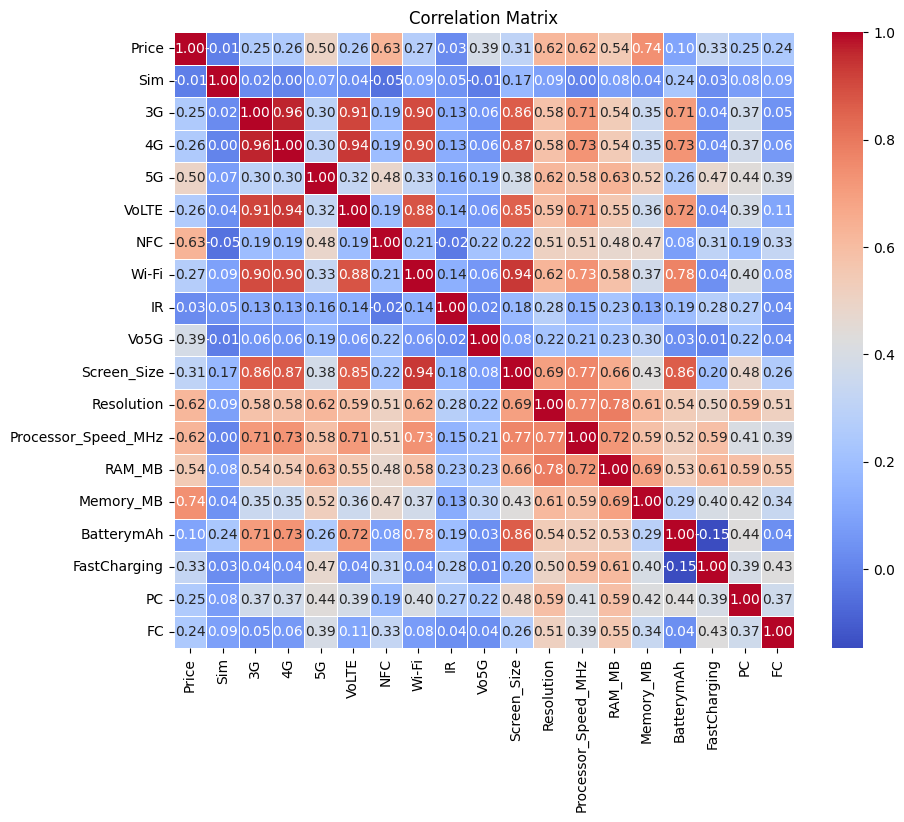

In [76]:
correlation_matrix = df[['Price', 'Sim', '3G', '4G', '5G', 'VoLTE', 'NFC', 'Wi-Fi',
       'IR', 'Vo5G', 'Screen_Size', 'Resolution', 'Processor_Speed_MHz',
       'RAM_MB', 'Memory_MB', 'BatterymAh', 'FastCharging', 'PC', 'FC']].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

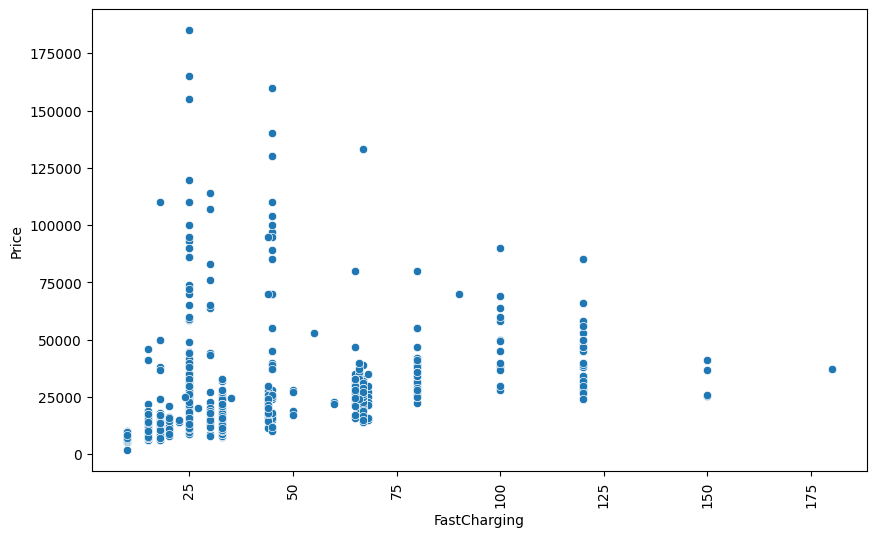

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FastCharging', y='Price')
# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

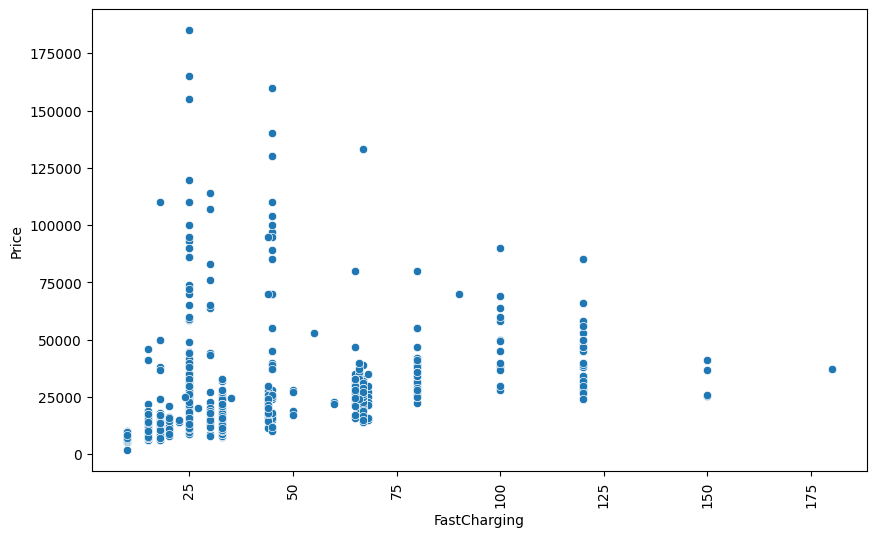

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FastCharging', y='Price')
plt.xticks(rotation=90)
plt.show()

In [79]:
y = df['Price'].apply(price_to_class)
y_price = df['Price']

In [80]:
df.drop(columns=['Price'], inplace=True)

In [81]:
df['OS'] = df.OS.fillna(value='Other')
df = pd.get_dummies(df, columns=['OS'], prefix='OS')

In [82]:
df.Vendor.isna().sum()

0

In [83]:
df['Vendor'] = df.Vendor.fillna(value='Other')
df = Encode_Vendor(df)

In [84]:
pd.set_option('display.max_columns', None)
df.sample(2)

,Sim,3G,4G,5G,VoLTE,NFC,Wi-Fi,IR,Vo5G,Screen_Size,Resolution,Processor_Speed_MHz,RAM_MB,Memory_MB,BatterymAh,FastCharging,PC,FC,Version,OS_Android,OS_Other,OS_iOS,Vendor_APPLE,Vendor_INFINIX,Vendor_ITEL,Vendor_MOTOROLA,Vendor_NOKIA,Vendor_ONEPLUS,Vendor_OPPO,Vendor_Other,Vendor_POCO,Vendor_REALME,Vendor_SAMSUNG,Vendor_TECNO,Vendor_VIVO,Vendor_XIAOMI
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
581,2,1,1,1,1,1,1,0,0,6.62,2592000,3200.0,8192.0,131072.0,5000.0,65.0,64.0,16.0,11,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
146,2,1,1,0,1,0,1,0,0,6.71,1188000,2000.0,4096.0,65536.0,5000.0,10.0,50.0,5.0,12,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [85]:
df.columns

Index(['Sim', '3G', '4G', '5G', 'VoLTE', 'NFC', 'Wi-Fi', 'IR', 'Vo5G',
       'Screen_Size', 'Resolution', 'Processor_Speed_MHz', 'RAM_MB',
       'Memory_MB', 'BatterymAh', 'FastCharging', 'PC', 'FC', 'Version',
       'OS_Android', 'OS_Other', 'OS_iOS', 'Vendor_APPLE', 'Vendor_INFINIX',
       'Vendor_ITEL', 'Vendor_MOTOROLA', 'Vendor_NOKIA', 'Vendor_ONEPLUS',
       'Vendor_OPPO', 'Vendor_Other', 'Vendor_POCO', 'Vendor_REALME',
       'Vendor_SAMSUNG', 'Vendor_TECNO', 'Vendor_VIVO', 'Vendor_XIAOMI'],
      dtype='object')

<Axes: xlabel='Price', ylabel='Density'>

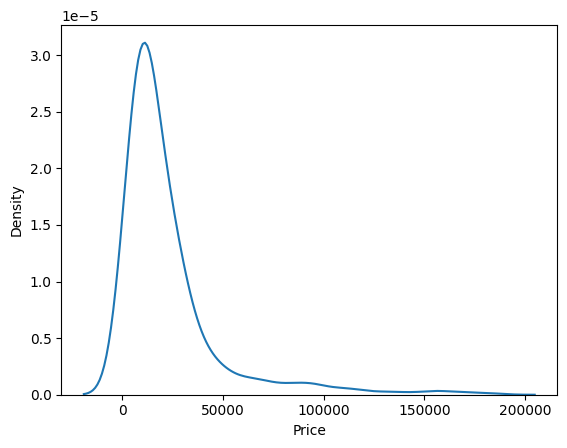

In [86]:
sns.kdeplot(data=y_price)

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, train_test_split

def evaluate_model(model, X, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # For regular cross-validation
    # stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # For stratified cross-validation
    scores = cross_val_score(model, X, y, cv=kfold, scoring='recall')  # For regular cross-validation
    # scores = cross_val_score(model, X, y, cv=stratified_kfold)  # For stratified cross-validation
    # for metric, score in zip(scoring, scores.T):
    #     print(f"{metric}: {score.mean():.3f} (±{score.std():.3f})")
    print(scores)

In [88]:
pipeline = Pipeline([
    ('impute_Processor_Speed_MHz', FunctionTransformer(Impute_Processor_Speed_MHz)),
    ('impute_RAM_MB', FunctionTransformer(Impute_RAM_MB)),
    ('impute_Memory_MB', FunctionTransformer(Impute_Memory_MB)),
    ('impute_BatterymAh', FunctionTransformer(Impute_BatterymAh)),
    ('impute_FastCharging', FunctionTransformer(Impute_FastCharging)),
    ('impute_FC', FunctionTransformer(Impute_FC)),
    ('impute_PC', FunctionTransformer(Impute_PC)),
    # ('impute_OS', FunctionTransformer(Impute_OS)),
    # ('impute_Version', FunctionTransformer(Impute_Version)),
    # ('encode_Vendor', FunctionTransformer(Encode_Vendor)),
    # ('encode_OS', FunctionTransformer(Encode_OS)),
    ('convert_Version', FunctionTransformer(Convert_Version)),
    ('impute_Version', FunctionTransformer(Impute_Version)),
    # ('model', RandomForestClassifier())
])

In [ ]:
# evaluate_model(pipeline, df, y)

In [89]:
df.columns

Index(['Sim', '3G', '4G', '5G', 'VoLTE', 'NFC', 'Wi-Fi', 'IR', 'Vo5G',
       'Screen_Size', 'Resolution', 'Processor_Speed_MHz', 'RAM_MB',
       'Memory_MB', 'BatterymAh', 'FastCharging', 'PC', 'FC', 'Version',
       'OS_Android', 'OS_Other', 'OS_iOS', 'Vendor_APPLE', 'Vendor_INFINIX',
       'Vendor_ITEL', 'Vendor_MOTOROLA', 'Vendor_NOKIA', 'Vendor_ONEPLUS',
       'Vendor_OPPO', 'Vendor_Other', 'Vendor_POCO', 'Vendor_REALME',
       'Vendor_SAMSUNG', 'Vendor_TECNO', 'Vendor_VIVO', 'Vendor_XIAOMI'],
      dtype='object')

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [91]:
X_train = pipeline.fit_transform(X_train)
X_train

,Sim,3G,4G,5G,VoLTE,NFC,Wi-Fi,IR,Vo5G,Screen_Size,Resolution,Processor_Speed_MHz,RAM_MB,Memory_MB,BatterymAh,FastCharging,PC,FC,Version,OS_Android,OS_Other,OS_iOS,Vendor_APPLE,Vendor_INFINIX,Vendor_ITEL,Vendor_MOTOROLA,Vendor_NOKIA,Vendor_ONEPLUS,Vendor_OPPO,Vendor_Other,Vendor_POCO,Vendor_REALME,Vendor_SAMSUNG,Vendor_TECNO,Vendor_VIVO,Vendor_XIAOMI
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
743,2,1,1,0,1,0,1,0,0,6.52,1152000,2300.0,3072.0,32768.0,4230.0,10.0,13.0,5.0,11,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
137,2,1,1,1,1,0,1,0,0,6.72,2592000,2200.0,4096.0,131072.0,5000.0,33.0,50.0,8.0,13,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
799,2,1,1,0,1,0,1,0,0,5.00,408000,2.0,2048.0,32768.0,3000.0,10.0,13.0,5.0,13,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
933,2,1,1,0,1,0,1,0,0,6.39,1123200,2000.0,4096.0,65536.0,4000.0,10.0,48.0,16.0,10,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
822,2,1,1,1,1,0,1,0,0,6.38,2592000,2200.0,8192.0,131072.0,4500.0,44.0,64.0,16.0,13,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2,1,1,0,1,0,1,0,0,6.51,1152000,2300.0,4096.0,131072.0,5000.0,10.0,13.0,5.0,12,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
270,2,1,1,1,1,1,1,0,0,4.70,1000500,3220.0,6144.0,131072.0,5000.0,10.0,12.0,7.0,15,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
860,2,0,0,0,0,0,0,0,0,1.80,20480,2200.0,4.0,4.0,1200.0,10.0,0.3,0.0,1,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [92]:
X_test = pipeline.fit_transform(X_test)
X_test

,Sim,3G,4G,5G,VoLTE,NFC,Wi-Fi,IR,Vo5G,Screen_Size,Resolution,Processor_Speed_MHz,RAM_MB,Memory_MB,BatterymAh,FastCharging,PC,FC,Version,OS_Android,OS_Other,OS_iOS,Vendor_APPLE,Vendor_INFINIX,Vendor_ITEL,Vendor_MOTOROLA,Vendor_NOKIA,Vendor_ONEPLUS,Vendor_OPPO,Vendor_Other,Vendor_POCO,Vendor_REALME,Vendor_SAMSUNG,Vendor_TECNO,Vendor_VIVO,Vendor_XIAOMI
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
523,2,1,1,1,1,0,1,0,0,6.44,2592000,2400.0,8192.0,131072.0,4000.0,33.0,64.0,44.0,11,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
602,2,1,1,0,1,0,0,0,0,2.40,134400,256.0,32.0,32.0,3000.0,10.0,0.3,0.0,1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
526,2,1,1,1,1,1,1,0,0,6.20,2592000,2900.0,8192.0,262144.0,4000.0,25.0,64.0,10.0,10,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
31,2,1,1,1,1,1,1,1,0,6.74,3437280,3050.0,8192.0,131072.0,5000.0,80.0,50.0,16.0,13,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
616,2,0,0,0,0,0,0,0,0,2.80,76800,2300.0,6144.0,131072.0,10000.0,10.0,0.3,0.0,1,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2,1,1,0,1,0,1,0,0,6.60,2604960,2000.0,4096.0,65536.0,5000.0,33.0,50.0,16.0,11,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
449,1,1,1,0,1,1,1,0,0,4.70,1000500,1840.0,2048.0,32768.0,1715.0,10.0,12.0,5.0,9,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
783,2,1,1,0,1,0,1,0,0,5.45,1036800,2000.0,2048.0,16384.0,3000.0,10.0,13.0,5.0,8,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def get_results(y_test, y_pred):
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

In [94]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy: ', svm.score(X_test, y_test))

y_pred = svm.predict(X_test)
get_results(y_test, y_pred)

Accuracy:  0.5441176470588235
Precision: 0.48962290277645737
Recall: 0.5441176470588235
F1-score: 0.45033845529005617


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Accuracy: ', lr.score(X_test, y_test))

y_pred = lr.predict(X_test)
get_results(y_test, y_pred)

Accuracy:  0.6323529411764706
Precision: 0.6448025488751138
Recall: 0.6323529411764706
F1-score: 0.6298200985497606


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Accuracy: ', rf.score(X_test, y_test))

y_pred = rf.predict(X_test)
get_results(y_test, y_pred)

Accuracy:  0.803921568627451
Precision: 0.803951762523191
Recall: 0.803921568627451
F1-score: 0.8031975223489


In [104]:
import xgboost

xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
print('Accuracy: ', xgb.score(X_test, y_test))

y_pred = xgb.predict(X_test)
get_results(y_test, y_pred)

Accuracy:  0.8088235294117647
Precision: 0.8095118310482088
Recall: 0.8088235294117647
F1-score: 0.8084008252888708


In [105]:
df.columns

Index(['Sim', '3G', '4G', '5G', 'VoLTE', 'NFC', 'Wi-Fi', 'IR', 'Vo5G',
       'Screen_Size', 'Resolution', 'Processor_Speed_MHz', 'RAM_MB',
       'Memory_MB', 'BatterymAh', 'FastCharging', 'PC', 'FC', 'Version',
       'OS_Android', 'OS_Other', 'OS_iOS', 'Vendor_APPLE', 'Vendor_INFINIX',
       'Vendor_ITEL', 'Vendor_MOTOROLA', 'Vendor_NOKIA', 'Vendor_ONEPLUS',
       'Vendor_OPPO', 'Vendor_Other', 'Vendor_POCO', 'Vendor_REALME',
       'Vendor_SAMSUNG', 'Vendor_TECNO', 'Vendor_VIVO', 'Vendor_XIAOMI'],
      dtype='object')

In [107]:
df = pipeline.fit_transform(df)
rf.fit(df, y)

RandomForestClassifier()

In [109]:
import pickle

# Save the trained model to disk
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Done! *** Good Luck ***